# Context
This notebook is designed to visualise the impact of different parameters on a light curve model on their own. For that purpose, indivudual sets of light curves are computed and the plotted together.

Hence, this notebook is merely there for educational purposes, virtually void of scientific value.

In [1]:
import sys, os

from threeML import *

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

%matplotlib inline

16:45:56 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=76060;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=258725;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=444561;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=836658;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=924114;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=462805;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

16:45:57 WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=61607;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=100924;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=821414;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=166886;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=71800;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=430658;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=828401;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=750899;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=322796;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=804648;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=151967;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=629079;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

In [2]:
par_names = ['Inkl', 'T_Sec', 'T_Disc', 'f_r', 'R_inner', 'T_HS']

I_vals = np.arange(30, 71, 5)
T2_vals = np.arange(3000, 6001, 1000)
TD_vals = np.arange(2000, 5001, 1000)
f_vals = np.arange(0, 1.01, 0.2)
R_vals = np.arange(1000, 10000, 2000)
Ths_vals = np.arange(3000, 7000, 1000)

In [3]:
def parameter_study(Inkl, T2, Tdisk, rout, rin, Ths, phaseoffset=0, ax=None):
    '''Wrapper function for generating a set of light curves and plotting them.
    If no axis instance is provided, generates one (results in maaaaany figures
    if not done carefully, so be warned.)'''
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,9))
    phases = np.arange(0.0, 1.01, 0.01)
    lColor = ['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
    
    ## reading in file
    with open('single_xrb_file.py', 'r') as root:
        lines = root.readlines()
        
        ## creating empty file to write into
        with open('gone_in_a_second.py', 'w') as branch:
        
            for line in lines:
                ## replace parameters in mother file
                if 'Inkl =' in line:
                    line = line.replace(line.split(' = ')[1], str(Inkl)+'\n')
                if 'T_Sec =' in line:
                    line = line.replace(line.split(' = ')[1], str(T2)+'\n')
                if 'T_Disc =' in line:
                    line = line.replace(line.split(' = ')[1], str(Tdisk)+'\n')
                if 'f_r =' in line:
                    line = line.replace(line.split(' = ')[1], str(rout)+'\n')
                if 'R_inner =' in line:
                    line = line.replace(line.split(' = ')[1], str(rin)+'\n')
                if 'T_HS =' in line:
                    line = line.replace(line.split(' = ')[1], str(Ths)+'\n')
                if 'phaseoffset =' in line:
                    line = line.replace(line.split(' = ')[1], str(phaseoffset)+'\n')                    
                branch.write(line)
        
    ### execute the modified file
    
    os.system('python gone_in_a_second.py')
    
    ### plot the results
    
    xrb_output = np.loadtxt("XRbparallel/XRbpar1/{}{}{}{}{}".format(Inkl, T2, Tdisk, rout, rin))
    
    for j in range(7):
        ax.plot(phases, xrb_output[:, j], '-', c=lColor[j], alpha=0.8, label='XRB output')
        
    ax.set_xlabel(r"Phase $\theta$", fontsize=20)
    handles, labels = ax.get_legend_handles_labels()
    handles_up = [Line2D([0], [0], color = 'k', linestyle='--'), Line2D([0], [0], color = 'k', linestyle='-')]
    ax.legend(handles_up, (labels[0], labels[-1]), fontsize =20, loc = 1)
    ax.set_ylabel("Magnitude [AB]", fontsize =20)
    ax.tick_params(axis = 'both', direction = 'in', top = True, right = True, labelsize = 15)
    
    plt.title('Parameters: i={}, T2={}, Td={}, f_r={}, R_in={}, T_HS={}'.format(Inkl, T2, Tdisk, rout, rin, Ths))
    plt.gca().invert_yaxis()
    # plt.tight_layout()
    
    # plt.savefig('plots/ParameterStudy/Model_validation_test_{:02d}.pdf'.format(number), format='pdf')
    
    # plt.show()

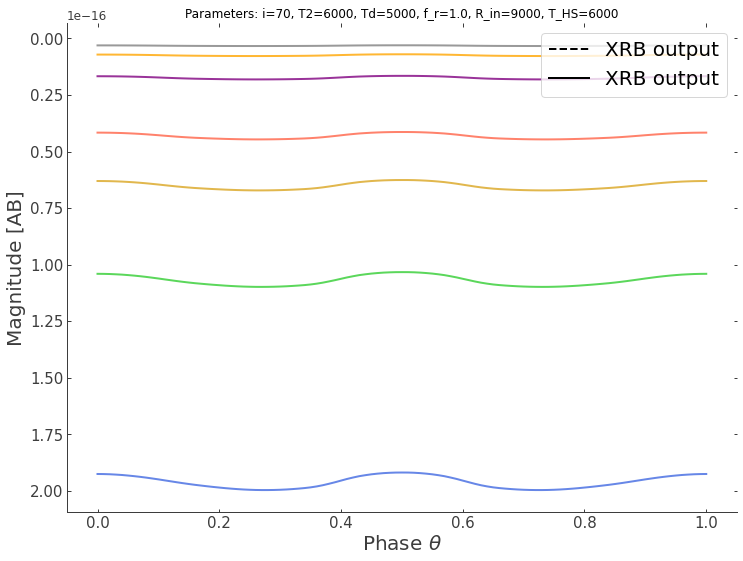

In [7]:
parameter_study(I_vals[-1], T2_vals[-1], TD_vals[-1], f_vals[-1], R_vals[-1], Ths_vals[-1])